<a href="https://colab.research.google.com/github/kvapiltomas/projects/blob/master/price_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
import smtplib

link = "https://roboticke-vysavace.heureka.cz/xiaomi-mi-robot-vacuum/"
link_tv = "https://televize.heureka.cz/sony-bravia-kd-55xf7596/?gclid=CjwKCAiA3uDwBRBFEiwA1VsajIpE9DgmF8Meppz9WIdZhLF7rCRghJ6cQ-6duSAJhpbD2nzQdUWyuhoCzwkQAvD_BwE"
links = [link_robot, link_tv]

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36"}

def check_price():
  
    my_price = 8000

    create_product_list(8000,'vacuum cleaner', 'Xiaomi Mi Robot', ['SONY TV'])

    for link in links:
        web = requests.get(link, headers= headers)

        if web:
            print("successfully found product\n")
        else:
            print("error")

        bs = BeautifulSoup(web.content, "html.parser")

        #print(bs.prettify())

        name= bs.find('h1', {'itemprop': 'name'}).get_text()
        price = bs.find('span', {'itemprop':'price'}).get_text()
        sep = 'Kč'
        price_f = price.replace(" ","").split(sep, 1)[0]

        

        if int(price_f) < my_price:
            send_email(price_f)
        elif int(price_f) == my_price:
            print("Price have reached your target price")
        else:
            print("Be patient")


def send_email(price_f):
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.ehlo()
        server.starttls()
        server.ehlo()
        
        user = 'thomik99@gmail.com'
        passw = 'mcxfxqxgmtrqgggs'

        server.login(user, passw)
        
        subject = 'Price dropped below you target'
        body = f'Price is {price_f} Kc. You can check it here: {link} .'
        msg = f'Subject: {subject}\n\n{body}'
      
        server.sendmail(
            from_addr = 'HLIDAC 2.0'
            ,to_addrs = 'kvapta@seznam.cz'
            ,msg = msg
        )
        print('email has been sent')
        
        server.quit()

def create_product_list(price: str, product_type, product_name: str, product_list: None, category: str = 'NeedToBuy'):
    if not product_list:
      product_list= []

    product_list.append(product_name)

    return {
        'category': category,
        'product_name': product_name,
        'product_list': product_list
            }
product1 = create_product_list(8000, 'vacuum cleaner', 'Xiaomi Mi Robot', ['SONY TV'])

print(product1)

check_price()

{'category': 'NeedToBuy', 'product_name': 'Xiaomi Mi Robot', 'product_list': ['SONY TV', 'Xiaomi Mi Robot']}
successfully found product

email has been sent
successfully found product

Be patient


In [0]:
import requests
ENDPOINT = "http://gw.kbcloud.cz/sandbox/exchange-rates/v1"
response = requests.get(f"{ENDPOINT}")
return response.json()




SyntaxError: ignored

In [0]:
def create_product_list(cena: str,  product_name: str, product_list: None):
      if not product_list:
        product_list= []

      product_list.append(product_name)

      return {
          'category': category,
          'product_name': product_name,
          'product_list': product_list
              }
product1 = create_product_list('8000','vacuum cleaner', 'Xiaomi Mi Robot', ['SONY TV'])
product2 = create_product_list(3000,'fridge', 'AEG',[])
product3 = create_product_list(4000,'tv', 'Sony',[])

print(product1)



TypeError: ignored

In [0]:
def create_product_list(category: str,  product_name: str, product_list = []):

    product_list.append(product_name)

    return {
        'category': category,
        'product_name': product_name,
        'product_list': product_list
            }
product1 = create_product_list('vacuum cleaner', 'Xiaomi Mi Robot')
product2 = create_product_list('fridge', 'AEG')
product3 = create_product_list('tv', 'Sony')

print(product1)


[{'category': 'vacuum cleaner', 'product_name': 'Xiaomi Mi Robot', 'product_list': ['Xiaomi Mi Robot', 'AEG', 'Sony']}, {'category': 'fridge', 'product_name': 'AEG', 'product_list': ['Xiaomi Mi Robot', 'AEG', 'Sony']}, {'category': 'tv', 'product_name': 'Sony', 'product_list': ['Xiaomi Mi Robot', 'AEG', 'Sony']}]


In [0]:
import requests
from bs4 import BeautifulSoup
import smtplib

link_robot = "https://roboticke-vysavace.heureka.cz/xiaomi-mi-robot-vacuum/"
link_tv = "https://televize.heureka.cz/sony-bravia-kd-55xf7596/?gclid=CjwKCAiA3uDwBRBFEiwA1VsajIpE9DgmF8Meppz9WIdZhLF7rCRghJ6cQ-6duSAJhpbD2nzQdUWyuhoCzwkQAvD_BwE"
links = [link_robot, link_tv]
my_price = 8000
my_price_robot = 7000

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36"}

products = {}
class Product:
    def __init__(self, product_name, product_price):
        self.name = product_name
        self.price = product_price

    def get_details(self):
        for link in links:
            web = requests.get(link, headers= headers)

            if web:
                print("successfully connected\n")
            else:
                print("error")

            bs = BeautifulSoup(web.content, "html.parser")

            #print(bs.prettify())

            name= bs.find('h1', {'itemprop': 'name'}).get_text()
            price = bs.find('span', {'itemprop':'price'}).get_text()
            sep = 'Kč'
            price_f = price.replace(" ","").split(sep, 1)[0]
            products.update(name, price_f)
            #create_product_list('Electronics', name, ['SONY TV'])
            print(products)
            #print(product1)

        #if int(price_f) < my_price:
        #    send_email(price_f)
       # elif int(price_f) == my_price:
        #    print("Price have reached your target price")
        #else:
       #     print("Be patient")


    def send_email(price_f):
            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()
            server.starttls()
            server.ehlo()
            
            user = 'thomik99@gmail.com'
            passw = 'mcxfxqxgmtrqgggs'

            server.login(user, passw)
            
            subject = 'Price dropped below you target'
            body = f'Price is {price_f} Kc. You can check it here: {link} .'
            msg = f'Subject: {subject}\n\n{body}'
          
            server.sendmail(
                from_addr = 'HLIDAC 2.0'
                ,to_addrs = 'kvapta@seznam.cz'
                ,msg = msg
            )
            print('email has been sent')
            
            server.quit()

    def create_product_list(product_type: str,  name, product_list: None,  category: str = 'NeedToBuy'):
          if not product_list:
              product_list= []

          product_list.append(name)

          print(product1)

          return {
              'category': category,
              'product_name': name,
              'product_list': product_list
                  }
        

    check_price()

successfully connected



TypeError: ignored

In [0]:
import requests
from bs4 import BeautifulSoup
import smtplib
import json

link_robot = "https://roboticke-vysavace.heureka.cz/xiaomi-mi-robot-vacuum/"
link_tv = "https://televize.heureka.cz/sony-bravia-kd-55xf7596/?gclid=CjwKCAiA3uDwBRBFEiwA1VsajIpE9DgmF8Meppz9WIdZhLF7rCRghJ6cQ-6duSAJhpbD2nzQdUWyuhoCzwkQAvD_BwE"
links = [link_robot, link_tv]
my_price = 8000
my_price_robot = 7000

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36"}


class Product:
      def __init__(self, product_name, price_f):
          self.name = product_name
          self.price = price_f
          self.user_price = []
          
      def print(self):
          print(self.name)
          print(self.price)

      def price_check(self):
          print('Product ' + self.name + ' currently costs ' + self.price)

      def comparison(self):
          if int(self.price) < my_price:
              send_email(self.price)
          elif int(self.price) == my_price:
              print("Price of" + self.name + "have reached your target price")
          else:
              print("Be patient")


def connect():
    for link in links:
        web = requests.get(link, headers= headers)

        if web:
            print("successfully connected to: \n" + link + '\n')
            get_details(web)
        else:
            print('connection to' + link + 'failed\n')
            

def get_input():
    global my_price
    print('Enter q to quit the application')
        
    while True:
        product = input('Please select product - Robot / TV: \n ')
        if product == 'q':
              break
        elif product.lower() == 'tv':
              price = input('Please tell us your price: \n ')
              if price == 'q':
                  break
              else:
                  my_price = int(price)
        else:
              print('Please enter Robot or TV')

    
def get_details(web):        
        bs = BeautifulSoup(web.content, "html.parser")

            #print(bs.prettify())

        product_name = bs.find('h1', {'itemprop': 'name'}).get_text()
        product_price = bs.find('span', {'itemprop':'price'}).get_text()
        sep = 'Kč'
        price_f = product_price.replace(" ","").split(sep, 1)[0]
        #print(product_name, product_price)
        
        my_product = Product(product_name, price_f)    
        print(my_product.price_check())
        print(my_product.comparison())
        #product_name[product_name] = product_name
        #product_name[product_price] = product_price
        # print(product_name)
        #print(Product.product_price)


def send_email(price_f):
            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.ehlo()
            server.starttls()
            server.ehlo()
            
            user = 'thomik99@gmail.com'
            passw = 'mcxfxqxgmtrqgggs'

            server.login(user, passw)
            
            subject = 'Price dropped below you target'
            body = f'Price is {price_f} Kc. You can check it here: .'
            msg = f'Subject: {subject}\n\n{body}'
          
            server.sendmail(
                from_addr = 'HLIDAC 2.0'
                ,to_addrs = 'kvapta@seznam.cz'
                ,msg = msg
            )
            print('email has been sent')
            
            server.quit()

#product1= Product(product_name, product_price)
#print(product1.get_details())
get_input()

connect()
#product = Product()

Enter q to quit the application
Please select product - Robot / TV: 
 tv
Please tell us your price: 
 10000
Please select product - Robot / TV: 
 q
successfully connected to: 
https://roboticke-vysavace.heureka.cz/xiaomi-mi-robot-vacuum/

Product Xiaomi Mi Robot Vacuum currently costs 6448
None
email has been sent
None
successfully connected to: 
https://televize.heureka.cz/sony-bravia-kd-55xf7596/?gclid=CjwKCAiA3uDwBRBFEiwA1VsajIpE9DgmF8Meppz9WIdZhLF7rCRghJ6cQ-6duSAJhpbD2nzQdUWyuhoCzwkQAvD_BwE

Product Sony Bravia KD-55XF7596 currently costs 17990
None
Be patient
None


In [0]:
def get_input():
    global robot_price, tv_price
    print('Enter q to quit the application')
        
    while True:
        product = input('Please select product - Robot / TV: \n ')
        if product == 'q':
              break
        elif product.lower() == 'tv':
              price = input('Please tell us your price: \n ')
              if price == 'q':
                  break
              else:
                  tv_price = price
        elif product.lower() == 'robot':
              price = input('Please tell us your price: \n ')
              if price == 'q':
                  break
              else:
                  robot_price = price
        else:
              print('Please enter Robot or TV')

get_input()


Enter q to quit the application
Please select product - Robot / TV: 
 tv
Please tell us your price: 
 10000
Please select product - Robot / TV: 
 q


NameError: ignored

NameError: ignored

Imprt of libraries

In [0]:
#libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline

Loading dataset

In [0]:
#check of data
NY = pd.read_csv('AB_NYC_2019.csv')

NY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
NY.info()
print('\nnumber of rows: '+ str(len(NY)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
name                              48895 non-null object
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null object
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 4.8+ MB

number of rows: 48895


DATA CLEANING


In [0]:
#deleting columns: id(not importannt), host_name (deleting due to matter of privacy and missing values, moreover we can use host_id instead of host_name)

NY = NY.drop(['id', 'host_name'], axis = 1)

NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


In [0]:
#checking null values
NY.isnull().sum()
#x = NY.isnull().sum().sort_values(ascending = False)[:5]
#y = NY.isnull().sum().sort_values(ascending = False)[:5].index
#plt.figure(figsize=(5,3))
#sns.barplot(x,y, palette = "GnBu_d")

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
#let notice that if the number_of_reviews is 0 then there last review and reviews_per_month values is null
NY1 = NY[NY.isna().any(axis = 1)]
NY1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [0]:
NY['reviews_per_month'].mean()

1.3732214298586884

In [0]:
NY['reviews_per_month'].fillna('0', inplace = True)
NY.drop(['last_review'], axis = 1, inplace = True)
NY['name'].fillna('Unknown', inplace = True)

In [0]:
NY.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


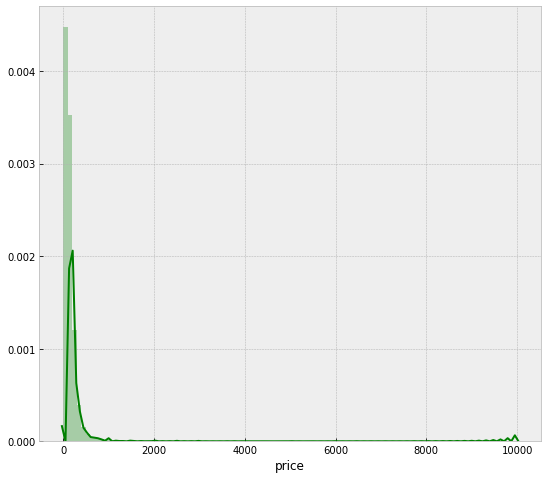

In [0]:
#price distribution
print(NY['price'].describe())
plt.figure(figsize=(9,8))
plt.style.use('bmh')
sns.distplot(NY['price'], color ='g', bins = 100, hist_kws = {'alpha':0.3})

In [0]:
NY.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.4,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [0]:
NY['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [0]:
NY.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [0]:
#types = NY['room_type'].unique()
NY['room_type'].loc[NY['room_type']== 'Private room'].count()
room_shares= []
for type in types:
    type_count = int(NY['room_type'].loc[NY['room_type']== type].count())
    share = (type_count/len(NY))*100
    room_shares.append(share)
print(room_shares)

[45.661110543000305, 51.96645873811229, 2.372430718887412]


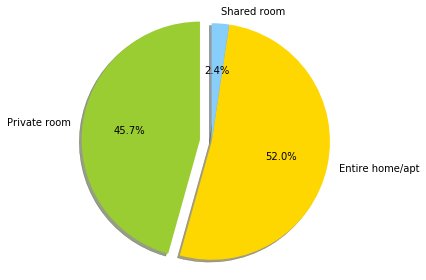

In [0]:
#labels = ['Private room', 'Entire home/apt', 'Shared room']
labels2 = NY['room_type'].unique()
shares = room_shares
explode = (0.1, 0, 0) 
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
texts = plt.pie(shares, explode = explode, colors=colors, labels = labels2, shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()